In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

# Introduction

This notebook is essential in guiding my decision-making process for a game theory task that involves the EU and Russia. The task requires two key parameters: an economic parameter and a public perception parameter. The public perception parameter's weight, represented as "alpha," needs to be determined to calculate the utility gained by each country in every node accurately. Similarly, we need a "beta" value to assist us in determining the economic parameter.


The alpha and beta constants are explicitly mentioned at the end of the very end of the notebook.

# Part 0

In Part 0 I did sentiment analysis on our Ukraine-Russia conflict tweets dataset. However, I realized that this wasn't very helpful towards the goal at hand. Sentiment simply provides how positive or negative the tweet is, it doesn't provide how positive or negative the tweet is towards Ukraine, which is what we need to guage public perception. However, I will still show you the work I did for sentiment analysis...

In [1]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\alexk\AppData\Roaming\nltk_data...


True

In [6]:
df= pd.read_csv('Data/tweets_russia_ukraine_first_month.csv')
df = df.dropna(subset=['Text'])
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1.49668E+18,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1.49669E+18,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1.49669E+18,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1.49669E+18,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1.49669E+18,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44081,2022-03-27 23:59:26+00:00,1.50823E+18,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,6.0,0,1.50823E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0
44082,2022-03-27 23:59:27+00:00,1.50823E+18,@tony07653102 @CNEWS Pour comprendre un confli...,philmarso,https://twitter.com/philmarso/status/150823226...,https://twitter.com/philmarso,NaN,NaN,0.0,0.0,1.0,0,1.50814E+18,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='CNEWS', id=18396319, displayna...",['#Ukraine'],1.0
44083,2022-03-27 23:59:34+00:00,1.50823E+18,"Putin ukrajinske vojnike naziva neonacizmom, a...",dicke5,https://twitter.com/dicke5/status/150823229041...,https://twitter.com/dicke5,NaN,NaN,0.0,0.0,0.0,0,1.50823E+18,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0
44084,2022-03-27 23:59:44+00:00,1.50823E+18,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0.0,0.0,0.0,0,1.50823E+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Ukraine,']",1.0


In [7]:
#Sentiment analysis function that takes a tweet and returns its sentiment
def get_tweet_sentiment(tweet):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(tweet)
    return scores['compound']
df['Sentiment'] = df['Text'].apply(get_tweet_sentiment)
df

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,Sentiment
0,2022-02-24 03:12:47+00:00,1.49668E+18,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,...,1,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0,0.0000
1,2022-02-24 03:18:54+00:00,1.49669E+18,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,...,8,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,-0.5423
2,2022-02-24 03:22:42+00:00,1.49669E+18,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,...,5,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,-0.1280
3,2022-02-24 03:25:36+00:00,1.49669E+18,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,...,149,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0,-0.3612
4,2022-02-24 03:27:28+00:00,1.49669E+18,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,...,22,1.49649E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0,-0.5719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44081,2022-03-27 23:59:26+00:00,1.50823E+18,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,...,0,1.50823E+18,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0,0.5574
44082,2022-03-27 23:59:27+00:00,1.50823E+18,@tony07653102 @CNEWS Pour comprendre un confli...,philmarso,https://twitter.com/philmarso/status/150823226...,https://twitter.com/philmarso,NaN,NaN,0.0,0.0,...,0,1.50814E+18,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='CNEWS', id=18396319, displayna...",['#Ukraine'],1.0,0.0000
44083,2022-03-27 23:59:34+00:00,1.50823E+18,"Putin ukrajinske vojnike naziva neonacizmom, a...",dicke5,https://twitter.com/dicke5/status/150823229041...,https://twitter.com/dicke5,NaN,NaN,0.0,0.0,...,0,1.50823E+18,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0,0.0000
44084,2022-03-27 23:59:44+00:00,1.50823E+18,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0.0,0.0,...,0,1.50823E+18,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Ukraine,']",1.0,-0.6597


In [8]:
df_tweet_sentiment= df[['Text','Sentiment']]
df_tweet_sentiment

,Text,Sentiment
0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,0.0000
1,🇺🇦 Kharkiv is officially being struck by major...,-0.5423
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...,-0.1280
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,-0.3612
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,-0.5719
...,...,...
44081,Russia’s mass media and telecommunications wat...,0.5574
44082,@tony07653102 @CNEWS Pour comprendre un confli...,0.0000
44083,"Putin ukrajinske vojnike naziva neonacizmom, a...",0.0000
44084,"Watch: amid war ruins in #Ukraine, unbowed cla...",-0.6597


In [13]:
df_tweet_sentiment.Sentiment.mean()

-0.0765487589054785

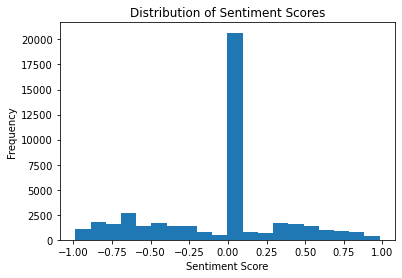

In [9]:


# Create a histogram of sentiment scores
plt.hist(df_tweet_sentiment['Sentiment'], bins=20)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()


In [25]:
positive_tweets = df_tweet_sentiment[df_tweet_sentiment['Sentiment'] < -0.5]['Text']


170    Dis place is so dry and boring where are my mu...
238    FUCKING BASTARDS!!! #RussiaWar https://t.co/se...
329    Boycott usa they are inhumane terrorist wicked...
416    @BombshellDAILY @KremlinRussia_E @SenateGOP @G...
Name: Text, dtype: object

Let's remove the rows where the sentiment was 0

In [43]:
df_tweet_sentiment_excl_neurtal = df_tweet_sentiment[df_tweet_sentiment['Sentiment'] != 0.0000]

In [44]:
df_tweet_sentiment_excl_neurtal

,Text,Sentiment
1,🇺🇦 Kharkiv is officially being struck by major...,-0.5423
2,🇺🇦 More angles on that strike in Kharkiv. #Rus...,-0.1280
3,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,-0.3612
4,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,-0.5719
5,🇺🇦 BORYSPIL AIRPORT IN #KYIV IS UNDER ATTACK. ...,-0.5904
...,...,...
44078,"A newly finished street artwork in Krakow, Pol...",0.2960
44079,#Biden Confirms Why the #US #Needed This #War:...,0.4215
44080,Remember this?\nSviatlana #tsikhanouskaya: You...,0.4767
44081,Russia’s mass media and telecommunications wat...,0.5574


In [45]:
df_tweet_sentiment_excl_neurtal.Sentiment.mean()

-0.14045836802664693

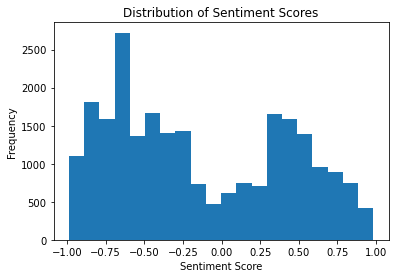

In [46]:
# Create a histogram of sentiment scores
plt.hist(df_tweet_sentiment_excl_neurtal['Sentiment'], bins=20)

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

The code bellow does topic modelling to show the main topics that appear in our tweets.

In [241]:
# Define the number of topics to identify
num_topics = 1

# Create a CountVectorizer object
#vectorizer = CountVectorizer(stop_words='english')
vectorizer = CountVectorizer(stop_words=['english','co', 'the', 'and', 'a', 'to', 'of', 'in', 'that', 'it', 'for', 'with','https', 'die', 'der', 'el', 'la', 'los', 'las', 'le', 'les', 'la', 'de', 'du', 'des'])


# Fit the vectorizer to the text data and transform it into a document-term matrix
dtm = vectorizer.fit_transform(df_tweet_sentiment['Text'])

# Create an LDA model and fit it to the document-term matrix
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(dtm)

# Print the topics identified by the model
for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i+1}: {' '.join([vectorizer.get_feature_names_out()[j] for j in topic.argsort()[:-6:-1]])}")


Topic 1: ukraine putin ukrainewar russia ukraineconflict


The results found in Part 0 are not very useful, hence we will skip this

# Part 1

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import openai
import os
from tqdm import tqdm
import time
import random

In [245]:
#Input OpenAI Access Token
api_access= 'API KEY'

In [21]:
df= pd.read_csv('Data/tweets_russia_ukraine_first_month.csv')
df = df.dropna(subset=['Text'])
df = df[['Datetime','Text']]
df.head()

,Datetime,Text
0,2022-02-24 03:12:47+00:00,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...
1,2022-02-24 03:18:54+00:00,🇺🇦 Kharkiv is officially being struck by major...
2,2022-02-24 03:22:42+00:00,🇺🇦 More angles on that strike in Kharkiv. #Rus...
3,2022-02-24 03:25:36+00:00,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...
4,2022-02-24 03:27:28+00:00,🇺🇦 Damage caused by strike in Kharkiv... #Russ...


Example tweet

In [42]:
df['Text'].iloc[9000]

'The #Ukraineconflict has made one thing clear: #Nuclear weapons are here to stay and any prospects for nuclear arms control and nuclear disarmament have receded further, opines @rakeshnms. https://t.co/9gRWF2riHS'

To determine the timeframe of the tweets, we can examine the "Datetime" column. Since the dataset is sorted in ascending order by datetime, we can simply look at the first and last rows to gain insight into the timeframe covered by the dataset.

In [22]:
print("Earliest Tweet:", df['Datetime'].iloc[0])
print("Latest Tweet:", df['Datetime'].iloc[-1])

Earliest Tweet: 2022-02-24 03:12:47+00:00
Latest Tweet: 2022-03-27 23:59:45+00:00


This is good as 24th of Feburary was the date where Russia deployed 200,000 troops, and was around the time where the EU started imposing sanctions. Between the 23rd of Feburary and the 15th of March was the timeframe where the EU implemnted their first four compliance packages (https://finance.ec.europa.eu/eu-and-world/sanctions-restrictive-measures/sanctions-adopted-following-russias-military-aggression-against-ukraine_en).

Sentiment analysis doesn't work well for our task at hand as we don't want to understand the general sentiment of the tweet, we want to understand the sentiment of the tweet towards Ukraine and Russia. Hence, we have to take a new approach. The approach we will take is to use OpenAI's large language Model GPT-3. We will access their API in order to evaluate each tweets sentiment towards the Ukraine and Russia. This is an interesting method as we are leveraging new technology to perform a classification task. Also, by using GPT-3 we benefit from not having to translate the tweets. This is because GPT-3 understands a variety of languages

Below is the function that uses OpenAI's GPT language model to classify the sentiment of a tweet.

The function takes a tweet, and classifies it with either a -1,0. or 1. The rules it uses for classification are the following:
- If the tweet expresses support for Ukraine or opposition towards Russia, it classifies the tweet as '1'. 
- If the tweet expresses opposition to Ukraine or support for Russia, it classifies the tweet as '-1'. 
- If the tweet does not express a clear sentiment for or against Ukraine or Russia, it classifies the tweet as '0'.
   
The generated classification is returned as an output by the function. We will apply this function to our tweets in our df.

The function that uses OpenAI's GPT language model to classify tweet sentiment offers a more nuanced and accurate classification of tweets than general sentiment analysis. This is because the GPT language model is trained on a massive amount of text data, which allows it to capture the intricacies and complexities of language use, including sarcasm, idiomatic expressions, and subtle connotations. As a result, the GPT-based sentiment analysis method can provide a more accurate interpretation of tweets, especially in a context as complex and nuanced as the EU-Russia relationship, where sentiment can often be obscured or ambiguous. By using the GPT-based sentiment analysis, we can obtain a more comprehensive understanding of the public sentiment towards Ukraine and Russia in our dataset.

In [132]:
def sentiment_gpt(tweet):
    
    prompt=f"Given that there is an ongoing conflict between Russia and Ukraine and that Putin is the president of Russia while Zelensky is the president of Ukraine, classify the sentiment of a given text as either supporting Ukraine, opposing Ukraine, or neutral. The text may discuss topics related to Russia or Ukraine as a whole, such as their presidents or cities in the country. If the text expresses support for Ukraine or opposition/dismay towards Russia, classify it as '1'. If the text expresses opposition to Ukraine or support for Russia, classify it as '-1'. If the text does not express a clear sentiment for or against Ukraine or Russia, classify it as '0'. \n\nText: {tweet}\n\nClassify: ###"
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop='###',
        temperature=0.2,
    )
    output = response["choices"][0]["text"]
    return output

Check the number of words in our tweets dataset

In [61]:
word_counts = df['Text'].apply(lambda x: len(str(x).split())).tolist()
total_word_count = sum(word_counts)
print("The number of words in our tweets dataset is:", total_word_count)

The number of words in our tweets dataset is: 1057389


As seen abover, there are around one million words in our tweets dataset. This would be very expensive to process one million words through the OpenAI API. Hence, we will simply randomly select 1000 tweets. This isn't ideal but 1000 tweets is still a relevant number of tweets given our limitations.

Make a new df with 1000 randomly selected tweets

In [133]:
#Run only once
df1 = df['Text'].sample(n=1000, random_state=43).to_frame()
df1= df1.reset_index()

In [134]:
df1

,index,Text
0,37327,@Jeggit Do not harm captive Russian soldiers a...
1,19796,#okhtyrka #UkraineWar https://t.co/A7MjCEfIOt
2,35327,#Juifs souviens toi! #Ukrainiens #Ukraine #Ukr...
3,41231,Russia transfers thousands of Mariupol civilia...
4,31107,One of Nemtsov's suspected murderers is now in...
...,...,...
995,11974,On the front page of the #Paris daily:\n\n#Ukr...
996,4641,Très bonne vidéo sur la situation en Ukraine d...
997,24717,Tatsächlich besorgniserregend &amp; zugleich e...
998,33835,Bare witness. Be Aware. Care. Such sadness her...


Find the Sentiment of the 1000 tweets

In [137]:
openai.api_key = api_access #API access
sentiments = []
for tweet in tqdm(df1['Text']):
    sentiment = sentiment_gpt(tweet)
    sentiments.append(sentiment)
    time.sleep(1.5) #needed due to the limit on the API requests per minute

 91%|█████████ | 910/1000 [32:45<03:14,  2.16s/it]


RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID e49e088eb19271a97161cb0bfe21dad6 in your message.)

In [138]:
len(sentiments)

910

Unfortunately, only the first 910 tweets could be evaluated out of the 1000 from the sample. There was a problem with the API. We will simply evaluate the next 90 tweets left in df1. 

In [139]:
openai.api_key = api_access #API access
for tweet in tqdm(df1['Text'][910:]):
    sentiment = sentiment_gpt(tweet)
    sentiments.append(sentiment)

 54%|█████▍    | 49/90 [00:59<00:49,  1.21s/it]


RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 68e161479407de39424190fa84c83efa in your message.)

In [141]:
len(sentiments)

959

Again an API issue. Just need to do the last 41 tweets.

In [142]:
for tweet in tqdm(df1['Text'][959:]):
    sentiment = sentiment_gpt(tweet)
    sentiments.append(sentiment)

100%|██████████| 41/41 [00:22<00:00,  1.83it/s]


Now we have a sentiment score for all the sample of tweets. We will make the assumption that this sample effectivley approximates the poppulation of 40,000+ tweets. 

In [145]:
#clean some of the data
index_to_replace = sentiments.index('\n1, 2, 3')
sentiments[index_to_replace] = '1'


In [147]:
#clean some of the data
index_to_replace = sentiments.index(' Neutral')
sentiments[index_to_replace]='0'
index_to_replace = sentiments.index(' Neutral (0)')
sentiments[index_to_replace]='0'

In [149]:
sentiments = [int(s) for s in sentiments]
df1.loc[:, 'Sentiment_llm'] = sentiments
df1

,index,Text,Sentiment_llm
0,37327,@Jeggit Do not harm captive Russian soldiers a...,0
1,19796,#okhtyrka #UkraineWar https://t.co/A7MjCEfIOt,0
2,35327,#Juifs souviens toi! #Ukrainiens #Ukraine #Ukr...,0
3,41231,Russia transfers thousands of Mariupol civilia...,-1
4,31107,One of Nemtsov's suspected murderers is now in...,1
...,...,...,...
995,11974,On the front page of the #Paris daily:\n\n#Ukr...,0
996,4641,Très bonne vidéo sur la situation en Ukraine d...,0
997,24717,Tatsächlich besorgniserregend &amp; zugleich e...,0
998,33835,Bare witness. Be Aware. Care. Such sadness her...,1


In [177]:
#Save the df to a csv
df1.to_csv('Data/sentiment_llm.csv', index=False)


In [192]:
#Reassign df1 to the csv we saved
df1=pd.read_csv('Data/sentiment_llm.csv')

 0    468
 1    426
-1    106
Name: Sentiment_llm, dtype: int64
 0    0.468
 1    0.426
-1    0.106
Name: Sentiment_llm, dtype: float64


<AxesSubplot:>

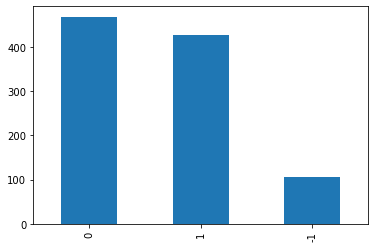

In [179]:
counts = df1['Sentiment_llm'].value_counts()
proportions = counts / len(df1)
print(counts)
print(proportions)
counts.plot(kind='bar')

As we can see above, most tweets seemed to be neutral. However, let's get an understanding for what neutral means to GPT-3 by seeing some examples of all classifications...

Example tweets classified as -1

In [151]:
# Select 5 random rows with Sentiment_llm equal to -1
indices = df1[df1['Sentiment_llm'] == -1].sample(n=5).index

# Display the "Text" element for each selected row
for i,index in enumerate(indices):
    print(f"Tweet {i+1}:\n{df1.loc[index, 'Text']}\n\n")


Tweet 1:
#putin should be more than paranoid now... https://t.co/1oBQ8dPi2d


Tweet 2:
L'associazione #macellai si dissocia: "#Putin non ci rappresenta".


Tweet 3:
This is one seriously demented piece of shit. https://t.co/7DnX4HloTI #MikhailMizintsev #WarCriminal #StandWithUkraine️ #UkraineWar


Tweet 4:
#PutinHitler #Putin #macellaio https://t.co/3vqe9GqFke


Tweet 5:
Dovrebbe spiegare perché lei ha finanziato lo #Spallanzani #Sputnik prima dei vaccini italiani ! Forse questo spiega la sua combine con #Putin #COVID19 https://t.co/VNhbBmGBFP




Example tweets classified as 0

In [152]:
# Select 5 random rows with Sentiment_llm equal to 0
indices = df1[df1['Sentiment_llm'] == 0].sample(n=5).index

# Display the "Text" element for each selected row
for i,index in enumerate(indices):
    print(f"Tweet {i+1}:\n{df1.loc[index, 'Text']}\n\n")


Tweet 1:
As Sanctions Batter Economy, Russians Face the Anxieties of a Costly War https://t.co/wkn5QjB5xl #Russia #RussiaUkraine #RussiaWar #VladimirPutin #SanctionRussiaNow #RussianEconomy #Sanctions #economy #Ukraine #UkraineRussiaWar #UkraineUnderAttack


Tweet 2:
https://t.co/0wP07xc2n4

Zelensky - the response was clear, #Ukraine won't be a #NATO member, "but publicly, the doors will remain open"

https://t.co/o5a6nD9Syf

Why keep vital info that could've prevented #UkraineWar secret?

#Biden #UkraineRussiaWar #UkraineRussiaCrisis #Truth


Tweet 3:
🙌 &lt;&lt;Zelensky says Ukraine ready to discuss neutrality in peace talks with Russia https://t.co/GDOouvYZ1c&gt;&gt; - Tweet from: @FT #Russia #Ukraine #Zelensky


Tweet 4:
#Ukraine #Russia #bbcnews https://t.co/AsKRkAI3GM


Tweet 5:
#RussianUkrainianWar 
#Russian 
#Ukraine 
#UkraineWar  
#Russia 
 
Updated special operation map
👇💥😵👇👇👇👇⛔⛔⛔⛔👇👇👇👇
https://t.co/eGkHzHTMyN




Example tweets classified as 1

In [154]:
# Select 5 random rows with Sentiment_llm equal to 1
indices = df1[df1['Sentiment_llm'] == 1].sample(n=5).index

# Display the "Text" element for each selected row
for i,index in enumerate(indices):
    print(f"Tweet {i+1}:\n{df1.loc[index, 'Text']}\n\n")

Tweet 1:
Ambulance blessed and donated by Pope Francis en route to Lviv https://t.co/rK0Ckmzxwr #UkraineRussiaWar #UkraineRussianWar #Ukraine #UkraineRussia #UkraineUnderAttaсk #UkraineWar


Tweet 2:
Hello, world! Ukraine is still fighting for each of you. Ukrainians defend life, freedom, democracy. 32 days as light resists darkness. Be with us! Fight with us! Act!

#CloseTheSkyOverUkraine #StandWithUkraine 
#Ukraine #StopRussianAggression


Tweet 3:
#StopRussia #StopWar 🇺🇦 https://t.co/kCQTjGCtTa


Tweet 4:
"HUGE SMOKE"

Russian airstrike hit Lviv a few minutes ago.

#UkraineWar #Russia #Russian #StandWithUkriane #UkraineUnderAttack https://t.co/uavlOBtICM


Tweet 5:
This is what they don't tell you
#Ukraine #UkraineConflict https://t.co/fi7goc2Yu0




As we can see, GPT classifies a tweet as neutral if the tweet is simply reporting news about the events occuring in Ukraine, if the tweet is neutral, or if the tweet is slightly random. Hence, it is more relevant to pay attention to the tweets classified as 1, and the tweets classified as -1. We can see that 

In [244]:
print(f"Percentage of 1's: {df1['Sentiment_llm'].value_counts()[1]/len(df1)*100}")
print(f"Number of tweets classified as '1': {df1['Sentiment_llm'].value_counts()[1]}")
print(f"Percentage of -1's: {df1['Sentiment_llm'].value_counts()[-1]/len(df1)*100}")
print(f"Number of tweets classified as '-1': {df1['Sentiment_llm'].value_counts()[-1]}")

Percentage of 1's: 42.6
Number of tweets classified as '1': 426
Percentage of -1's: 10.6
Number of tweets classified as '-1': 106


# Part 2

We need to also compare to a time period where people felt the effects relating to russia halting gas flow, in order to model the public perception of one of the end nodes of our game. So we will get tweets from the day Russia decided to halt the gas flow (3rd September 2022), two weeks from this date (17th September 2022), one month from the date (3rd October 2022) and two months from the date (3rd November 2022). This will give us a sample of tweets from different times after the gas flow was halted, in order to gauge public perception best. We have to specifically chose a few dates as there is no available dataset that is split by months for example, only specifically split by dates. 

In [161]:
import gzip


In [212]:
# Open the 09/03 compressed file and read it as text
with gzip.open('Data/part_2/0903_UkraineCombinedTweetsDeduped.csv.gzip', 'rt', encoding='utf-8') as f:
    # Load the file contents into a Pandas DataFrame
    df_0903 = pd.read_csv(f)
    df_0903 = df_0903.sample(n=10000, random_state=42) #Randomly select 10000 tweets
    df_0903 = df_0903.reset_index(drop=True)
    df_0903 = df_0903.rename(columns={'Unnamed: 0': 'Original index'})
    
    #df2=df2[['acctdesc']]

# Open the 09/17 compressed file and read it as text
with gzip.open('Data/part_2/0917_UkraineCombinedTweetsDeduped.csv.gzip', 'rt', encoding='utf-8') as f:
    # Load the file contents into a Pandas DataFrame
    df_0917 = pd.read_csv(f)
    df_0917 = df_0917.sample(n=10000, random_state=42) #Randomly select 10000 tweets
    df_0917 = df_0917.reset_index(drop=True)
    df_0917 = df_0917.rename(columns={'Unnamed: 0': 'Original index'})

# Open the 10/03 compressed file and read it as text
with gzip.open('Data/part_2/1003_UkraineCombinedTweetsDeduped.csv.gzip', 'rt', encoding='utf-8') as f:
    # Load the file contents into a Pandas DataFrame
    df_1003 = pd.read_csv(f)
    df_1003 = df_1003.sample(n=10000, random_state=42) #Randomly select 10000 tweets
    df_1003 = df_1003.reset_index(drop=True)
    df_1003 = df_1003.rename(columns={'Unnamed: 0': 'Original index'})

# Open the 11/03 compressed file and read it as text
with gzip.open('Data/part_2/1003_UkraineCombinedTweetsDeduped.csv.gzip', 'rt', encoding='utf-8') as f:
    # Load the file contents into a Pandas DataFrame
    df_1103 = pd.read_csv(f)
    df_1103 = df_1103.sample(n=10000, random_state=42) #Randomly select 10000 tweets
    df_1103 = df_1103.reset_index(drop=True)
    df_1103 = df_1103.rename(columns={'Unnamed: 0': 'Original index'})

#New Tweets df2 with randomly selected tweets from our new time frame
df2 = pd.concat([df_0903, df_0917, df_1003, df_1103], ignore_index=True)
df2 = df2.dropna(subset=['acctdesc']) #remove the empyt tweets
df2

,Original index,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,18892,14401794,unoemezzo,bio aggiornata.,"Rome, Italy",1067,445,15834,2008-04-15 22:12:46.000000,1566035658761801728,...,0,NaN,0,0,NaN,True,1565832084979163136,1496704253678731264,OSINTI1,2022-09-03 16:09:35.985811
1,13315,3086109673,Nachos_News,"""Hoping for the best, prepared for the worst"" ...",World,23,44,17053,2015-03-15 16:44:24.000000,1565995249062871040,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-09-03 18:26:43.027591
3,32677,15121509,Boomersaurus,GO UKRAINE!,Fighting in the Twitter trench,976,663,122448,2008-06-15 01:56:20.000000,1566133597504929795,...,0,NaN,0,0,NaN,True,1565986172802924544,1505481949854502912,Gerashchenko_en,2022-09-04 02:27:10.686323
4,27960,773092526584627200,HASHTAG2G1S,"discomforting truths, jokes way over your head",NaN,4795,3209,26555,2016-09-06 09:36:36.000000,1566099556580073472,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-09-03 23:57:17.653379
6,13816,1427259527926321161,DrumbegTwit,Grumpy old man. I'm not here for follows or li...,NaN,114,108,16381,2021-08-16 13:27:40.000000,1565998966034030594,...,0,NaN,1565735066214473728,1120633726478823424,ZelenskyyUa,False,0,0,NaN,2022-09-03 14:56:14.922536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,130863,154886766,khrystalline3,Nothing too much interesting. Just about busin...,"Houston, TX",331,2492,1284,2010-06-12 13:50:16,1576727710977912832,...,0,NaN,0,0,NaN,True,1576698281060888576,3129968261,TimothyDSnyder,2022-10-03 04:59:46.140894
39996,173547,1506936520661417987,KBoz3,The news and opinions not allowed on Western m...,NaN,724,753,10541,2022-03-24 10:10:59,1577005576156254209,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-10-04 02:58:56.315080
39997,141221,4510201,Tippling,Netzmensch und Pixelschubser. Liebt moorbraune...,Aachen,1115,1169,25201,2007-04-13 15:26:21,1576843568852791297,...,0,NaN,0,0,NaN,True,1576633801870299136,146958450,ragipsoylu,2022-10-03 11:21:36.589142
39998,157203,1524045139676704768,Oleksandr060286,"Хай живе, хай живе вільна Україна.Хай живуть, ...",Україна,28,5,532,2022-05-10 15:14:20,1576936840355287041,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-10-03 15:31:20.649191


In [213]:
#Save new df2 into a csv
df2.to_csv('Data/part_2/tweets_2.csv', index=False)

In [214]:
#Reassign df2 to the csv we saved
df2=pd.read_csv('Data/part_2/tweets_2.csv')
#We only want the tweet column
df2 = df2[['acctdesc']].rename(columns={'acctdesc': 'Tweet'})


Make a new df with 1000 randomly selected tweets from this new df2. We then will do the same process as we did for the first batch of tweets before.

In [215]:
df3 = df2['Tweet'].sample(n=1000, random_state=40).to_frame()
df3= df3.reset_index()
df3

,index,Tweet
0,30873,"Carpe Diem, Pluk de dag voordat je zelf in ee..."
1,5648,Deputy Crime Minister & Minister of Journalism...
2,26648,We Support 🇺🇦
3,6455,Pro-white Conservative entrepreneur \n#God #US...
4,21885,Fuck Russia
...,...,...
995,32358,"Digital 2D artist | 24 y.o | Ukraine, Kharkiv ..."
996,9109,🇺🇦 Ukraine News 🛰️ Reliable Credible\n📢 Crimea...
997,526,Geopolitics - Foreign Policy - International ...
998,32291,STOP À LA CENSURE DES HONNÊTES GENS QUI EXPRIM...


Find sentiments of these 1000 tweets

In [217]:
openai.api_key = api_access #API access
sentiments_2 = []
for tweet in tqdm(df3['Tweet']):
    sentiment = sentiment_gpt(tweet)
    sentiments_2.append(sentiment)
    time.sleep(0.5) #needed due to the limit on the API requests per minute

 55%|█████▌    | 553/1000 [15:42<12:41,  1.70s/it]   


APIConnectionError: Error communicating with OpenAI

In [220]:
len(sentiments_2)

553

Unfortunately, only the first 553 tweets could be evaluated out of the 1000 from the sample. There was a problem with the API. We will simply evaluate the next 447 tweets left in df2. 

In [221]:
openai.api_key = api_access #API access
for tweet in tqdm(df1['Text'][553:]):
    sentiment = sentiment_gpt(tweet)
    sentiments_2.append(sentiment)
    time.sleep(0.5) #needed due to the limit on the API requests per minute

 64%|██████▍   | 285/447 [05:59<03:24,  1.26s/it]


RateLimitError: That model is currently overloaded with other requests. You can retry your request, or contact us through our help center at help.openai.com if the error persists. (Please include the request ID 076fb2523a01d63ec7dcdf6d6ea72d2d in your message.)

In [222]:
len(sentiments_2)

838

Unfortunately, only the first 838 tweets could be evaluated out of the 1000 from the sample. There was a problem with the API. We will simply evaluate the next 162 tweets left in df2. 

In [223]:
openai.api_key = api_access #API access
for tweet in tqdm(df1['Text'][838:]):
    sentiment = sentiment_gpt(tweet)
    sentiments_2.append(sentiment)
    

100%|██████████| 162/162 [01:45<00:00,  1.54it/s]


In [228]:
#clean some of the data
index_to_replace = sentiments_2.index(' Neutral (0)')
sentiments_2[index_to_replace]='0'

In [230]:
sentiments_2 = [int(s) for s in sentiments_2]
df3.loc[:, 'Sentiment_llm'] = sentiments_2
df3

,index,Tweet,Sentiment_llm
0,30873,"Carpe Diem, Pluk de dag voordat je zelf in ee...",0
1,5648,Deputy Crime Minister & Minister of Journalism...,0
2,26648,We Support 🇺🇦,1
3,6455,Pro-white Conservative entrepreneur \n#God #US...,0
4,21885,Fuck Russia,-1
...,...,...,...
995,32358,"Digital 2D artist | 24 y.o | Ukraine, Kharkiv ...",0
996,9109,🇺🇦 Ukraine News 🛰️ Reliable Credible\n📢 Crimea...,0
997,526,Geopolitics - Foreign Policy - International ...,0
998,32291,STOP À LA CENSURE DES HONNÊTES GENS QUI EXPRIM...,1


In [231]:
#Save the df to a csv
df3.to_csv('Data/part_2/sentiment_llm_2.csv', index=False)


In [232]:
#Reassign df1 to the csv we saved
df3=pd.read_csv('Data/part_2/sentiment_llm_2.csv')

 0    672
 1    268
-1     60
Name: Sentiment_llm, dtype: int64
 0    0.672
 1    0.268
-1    0.060
Name: Sentiment_llm, dtype: float64


<AxesSubplot:>

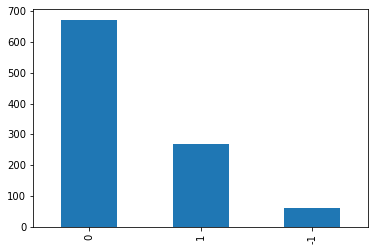

In [234]:
counts = df3['Sentiment_llm'].value_counts()
proportions = counts / len(df3)
print(counts)
print(proportions)
counts.plot(kind='bar')

As we can see above, most tweets seemed to be neutral. However, let's get an understanding for what neutral means to GPT-3 by seeing some examples of all classifications...

Bellow we can see that the percentage of 1's is 26.8% of the data, while the percentage of -1's is 6%.

In [243]:
print(f"Percentage of 1's: {df3['Sentiment_llm'].value_counts()[1]/len(df3)*100}")
print(f"Number of tweets classified as '1': {df3['Sentiment_llm'].value_counts()[1]}")
print(f"Percentage of -1's: {df3['Sentiment_llm'].value_counts()[-1]/len(df3)*100}")
print(f"Number of tweets classified as '-1': {df3['Sentiment_llm'].value_counts()[-1]}")

Percentage of 1's: 26.8
Number of tweets classified as '1': 268
Percentage of -1's: 6.0
Number of tweets classified as '-1': 60


# Comparing the Data

## Part 1 Data

In [247]:
print(f"Percentage of 1's: {df1['Sentiment_llm'].value_counts()[1]/len(df1)*100}")
print(f"Number of tweets classified as '1': {df1['Sentiment_llm'].value_counts()[1]}")
print(f"Percentage of -1's: {df1['Sentiment_llm'].value_counts()[-1]/len(df1)*100}")
print(f"Number of tweets classified as '-1': {df1['Sentiment_llm'].value_counts()[-1]}")

Percentage of 1's: 42.6
Number of tweets classified as '1': 426
Percentage of -1's: 10.6
Number of tweets classified as '-1': 106


## Part 2 Data

In [246]:
print(f"Percentage of 1's: {df3['Sentiment_llm'].value_counts()[1]/len(df3)*100}")
print(f"Number of tweets classified as '1': {df3['Sentiment_llm'].value_counts()[1]}")
print(f"Percentage of -1's: {df3['Sentiment_llm'].value_counts()[-1]/len(df3)*100}")
print(f"Number of tweets classified as '-1': {df3['Sentiment_llm'].value_counts()[-1]}")

Percentage of 1's: 26.8
Number of tweets classified as '1': 268
Percentage of -1's: 6.0
Number of tweets classified as '-1': 60


### Apply data to our game

We will assume that the % of tweets classified as '1' demonstrates the amount by which the EU population "supports" the Ukraine, while the % of tweets classified as '-1' demonstrates the amount by which the EU population "supports" Russia. Let's analyze the differences in % from Part 1 to Part 2.

In [252]:
#percent_change= (df1['Sentiment_llm'].value_counts()[1]-df3['Sentiment_llm'].value_counts()[1])/df1['Sentiment_llm'].value_counts()[1]*100
percent_dec_1= df3['Sentiment_llm'].value_counts()[1]/len(df3)*100-df1['Sentiment_llm'].value_counts()[1]/len(df1)*100

percent_dec_neg_1=df3['Sentiment_llm'].value_counts()[-1]/len(df3)*100-df1['Sentiment_llm'].value_counts()[-1]/len(df1)*100

print(f"Percentage decrease in 1's: {percent_dec_1}")
print(f"Percentage decrease in -1's: {percent_dec_neg_1}")


Percentage decrease in 1's: -15.8
Percentage decrease in -1's: -4.6


This shows that 15.8% less of the tweets showed support towards Ukraine. We also see that there was ~1.6x more support for Ukraine in time frame 1 compared to time frame 2. This will be the value we use to justify the difference in payoffs between certain end nodes for our "public perception parameter" in our game.

We will round 1.6 to 2 for the simplicity of our model. Hence, 2 will be our "alpha". The "alpha" parameter serves as a useful starting point for determining payoffs related to the public perception parameter. It offers a more meaningful and informed approach to calculating payoffs, thereby enabling us to make more accurate and nuanced decisions. By using the "alpha" parameter as a base reference, we can take into account the varying degrees of public perception and adjust our payoffs accordingly. This ensures that our decisions are grounded in a more realistic and representative understanding of the public sentiment towards the EU and Russia.

## Beta constant

Our constant 'Beta' will be informed by this website: https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Natural_gas_price_statistics#:~:text=Year%2Don%2Dyear%20non%2D,from%2067%25%20to%20271%25. It says gas prices increases across Europe ranged from 67% to 271%.". Hence to get Beta we will simply take the average of 67% and 271% (which is 169%), and then round accordingly. This leaves 'Beta' equal to 2. We will use this value to infrom the payoffs of our economic parameter. Gas price changes is a good indicator to evaluate an economy's stability as gas is a very common cost of production for most firms, meaning volatility in this statistic gives a good indication for the health of an economy.